# Trabajo práctico: Predicción de precios de casas

Alumnos: Noir Nicolas, González Ignacio

Año: 2024

Materia: Aprendizaje automático 1

Carrera: TUIA

## Descripcion de variables

Características de entrada en orden:

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

Variable de salida (target):

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


## Librerias

Descarga e instalación de librerias

In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install nbformat

Importación de librerias

In [57]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.exceptions import DataConversionWarning
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning

# Libreria necesaria para poder ocultar errores que empeoran la visualización del notebook
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## 3. Análisis descriptivo.

### Preprocesamiento de los datos

In [3]:
# Carga del dataset desde github para una agilización de el cargado de archivos.
# Descarte de los registros en donde la variable de salida es nula o vacía.
dataset_completo = pd.read_csv("https://github.com/nacho-gonz/AA1-Archivos-2024/raw/master/house-prices-tp.csv")
dataset_completo.dropna(subset=['MEDV'],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(dataset_completo.drop('MEDV', axis=1), dataset_completo['MEDV'].values.reshape(-1,1), test_size=0.2,random_state=42)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((428, 13), (107, 13), (428, 1), (107, 1))

In [5]:
# Observación sobre los tipos de datos y la cantidad de datos faltantes.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 290 to 106
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     420 non-null    float64
 1   ZN       419 non-null    float64
 2   INDUS    425 non-null    float64
 3   CHAS     420 non-null    float64
 4   NOX      419 non-null    float64
 5   RM       421 non-null    float64
 6   AGE      421 non-null    float64
 7   DIS      425 non-null    float64
 8   RAD      419 non-null    float64
 9   TAX      421 non-null    float64
 10  PTRATIO  423 non-null    float64
 11  B        421 non-null    float64
 12  LSTAT    421 non-null    float64
dtypes: float64(13)
memory usage: 46.8 KB


In [6]:
valores_faltantes = X_train[X_train.isna().any(axis=1)]
valores_faltantes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
458,12.510504,11.610423,14.404205,0.0,NaN,7.949105,95.592034,1.263211,NaN,NaN,12.865192,284.787493,27.789443
230,23.785283,67.378344,21.006485,0.0,0.859067,8.421051,70.780098,5.816282,17.164570,NaN,20.183706,370.991397,9.332422
128,NaN,NaN,13.613966,1.0,0.655441,6.934419,26.190734,10.590040,6.850123,433.579295,12.721609,81.889481,NaN
23,73.605747,90.434661,12.740286,0.0,NaN,8.050076,22.542424,5.731208,NaN,NaN,21.291610,NaN,NaN
223,NaN,NaN,15.523638,NaN,NaN,NaN,35.540367,1.967787,1.307128,NaN,13.364849,200.625160,NaN
348,79.412097,98.464003,20.954334,1.0,0.430283,5.619186,44.297865,5.877939,NaN,445.473858,20.605424,384.909594,27.389453
413,NaN,NaN,4.987915,NaN,0.420579,8.010940,NaN,11.109179,2.402424,614.073104,15.926526,47.855250,10.377838
172,48.331901,12.306287,25.400223,1.0,0.761800,NaN,77.547987,10.348195,NaN,NaN,15.579107,219.044542,29.736604
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962
268,NaN,NaN,14.566883,1.0,0.527807,4.679936,13.122262,4.401142,15.239579,280.681821,NaN,355.316828,34.482940


Observamos las filas que tienen NaN en alguno de sus variables

In [7]:
valores_faltantes.isna().sum(axis=1)

458    3
230    1
128    3
23     5
223    7
348    1
413    4
172    3
554    2
268    3
203    6
316    2
504    8
456    3
465    7
88     9
335    7
14     1
309    4
264    1
327    1
248    8
dtype: int64

Visualizamos la cantidad de nulos en las filas que contienen al menos un nulo.

In [8]:
X_train_compl = X_train.copy()
X_train_compl['MEDV'] = y_train
X_train_compl.dropna(thresh=8, inplace=True)

y_train_modif = X_train_compl['MEDV']
X_train_modif = X_train_compl.drop(columns='MEDV')

Tomamos la decisión de dropear los registros que tengan 7 o más valores nulos en sus variables, ya que representan más del 50% de la información de un registro. Además la cantidad de filas eliminadas representa menos del 5% de los datos.

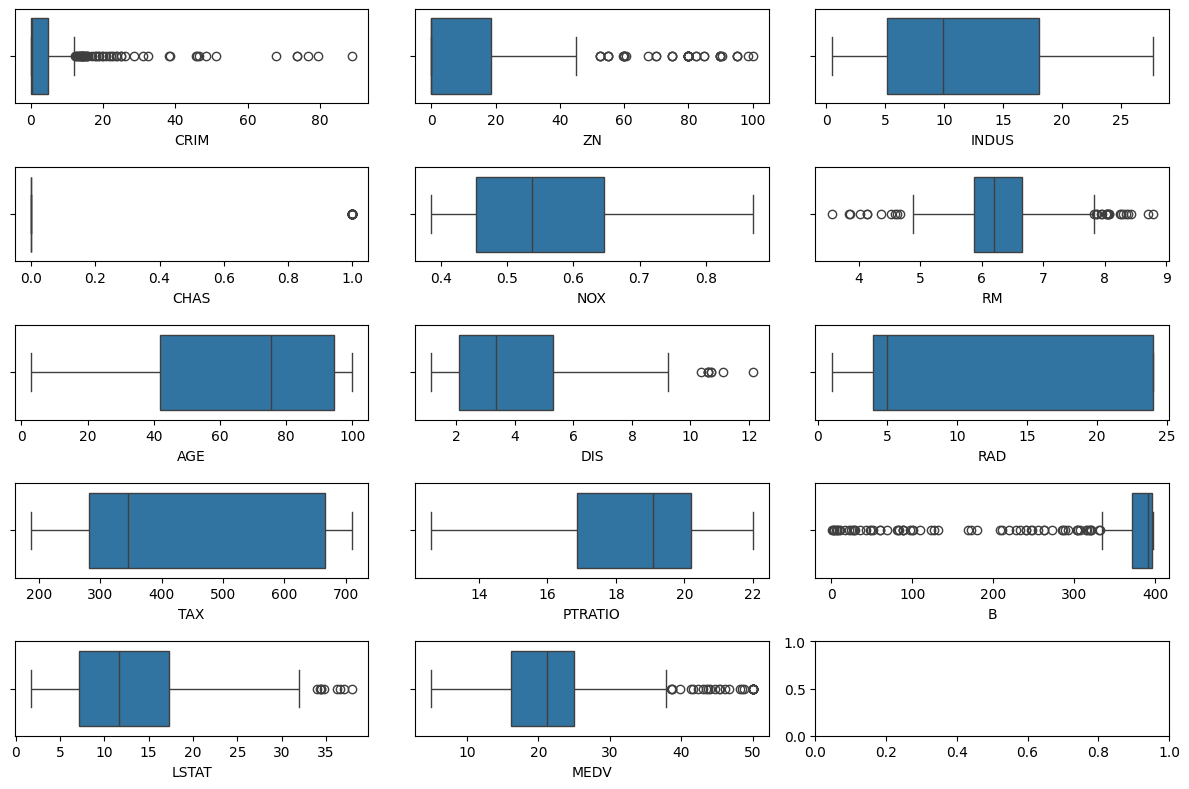

In [9]:
fig, axes = plt.subplots(5,3)

for name, ax in zip(X_train_compl, axes.flatten()):
    sns.boxplot(x=name, data=X_train_compl, orient='h', ax=ax)

fig.set_size_inches(12,8)
plt.tight_layout()
plt.show()

Visualizamos el centro y la extensión de las variables, es decir, su mediana, 75%, 25%, sus outliers y el rango intercuartilico. Para poder observar alguna anomalía en las variables, es decir, alguna distribución bimodal (Aunque en este gráfico no sea la mejor forma de visualizarlo y por eso grafiquemos los histogramas a continuación), CHAS que es una variable categorica, etc.

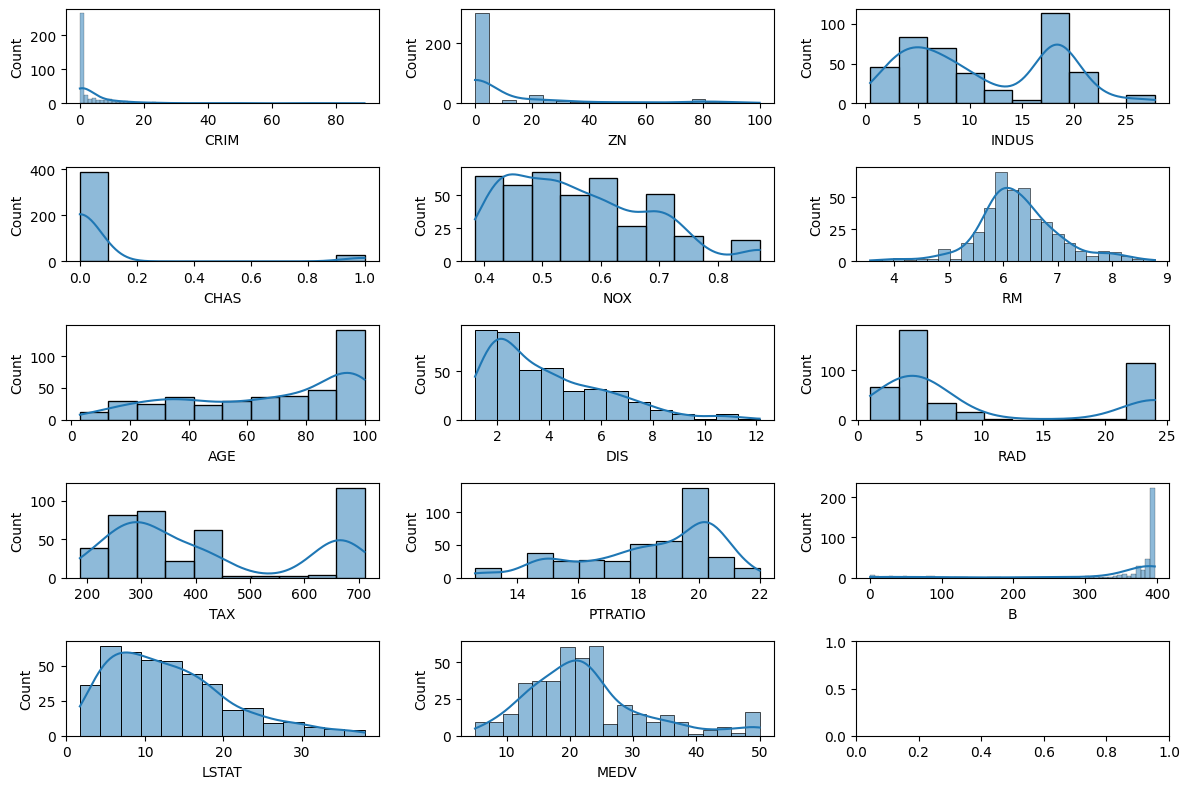

In [10]:
fig2, axes2 = plt.subplots(5,3)

for name, ax in zip(X_train_compl, axes2.flatten()):
    sns.histplot(x=name, data=X_train_compl, ax=ax,kde=True)

fig2.set_size_inches(12,8)
plt.tight_layout()
plt.show()

Visualizamos las distribuciones de las variables, pudiendo observar que RM tiene una distribución normal (pudiendo ser imputada por la media), TAX, RAD e INDUS parecen tener una distribución bimodal y por ultimo me arriesgo a decir que MEDV puede presentar una distribución CHI cuadrado.

In [11]:
modelo_escalado_imputado = make_pipeline(MinMaxScaler(), KNNImputer(n_neighbors=5)).set_output(transform='pandas')

x_train_imp_esc = modelo_escalado_imputado.fit_transform(X_train_modif, y_train_modif)
x_train_imp_esc['RAD'] = x_train_imp_esc['RAD'].round().astype('int')
x_train_imp_esc['CHAS'] = x_train_imp_esc['CHAS'].round().astype('category')

x_test_imp_esc = modelo_escalado_imputado.transform(X_test)

Al visualizar algunas distribuciones bimodales, decidimos utilizar KNN para imputar los datos faltantes, teniendo que escalar los datos de antemano, ya que podría entorpecer la imputación de los mismos.

### Visualización de los datos

In [12]:
fig = px.scatter(x=x_train_imp_esc['AGE'], y=x_train_imp_esc['DIS'], 
                title='Comparación entre la cercania a centros de empleo y la proporción de casas antiguas'
                , labels={'x':'Proporción de casas ocupadas por sus propietarios construidas antes de 1940',
                            'y':'Distancias ponderadas a cinco centros de empleo de Boston'})
fig.show()

Se observa una relación lineal negativa media entre la proporción de casas construidas antes de 1940 que estan ocupadas y la distancia a los centros de empleo, es decir, entre más casas construidas antes de 1940 hay, más cercano a 5 centros de empleos de boston va a estar.

In [13]:
fig = px.box(y_train_modif, x="MEDV",
            title='Distribución del valor mediano del precio de casas en cientos de miles de dólares')
fig.show()  

El 50% de las casas del dataset tienen hasta un precio de 21.2 cientos de miles de dolares. El 25% de las casas del dataset tienen hasta un precio de 16.15 cientos de miles de dolares. El 75% de las casas del dataset tienen hasta un precio de 25.6 cientos de miles de dolares.

In [14]:
fig = px.scatter(x=x_train_imp_esc['LSTAT'], y=y_train_modif, 
                title='Comparación de los precios de casas con el % de población de menor estatus socioeconómico'
                , labels={'x':'Porcentaje de población de menor estatus socioeconómico',
                            'y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa una relación lineal negativa debil-media entre el porcentaje de población de menor estatus socioeconómico y el Valor mediano de las casas en cientos de miles de dólares

In [15]:
fig = px.scatter(x=x_train_imp_esc['RM'], y=y_train_modif, 
                title='Comparación de los precios de casas con la cantidad de habitaciones en la misma'
                , labels={'x':'Número de habitaciones por vivienda','y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa una relación lineal positiva debil-media entre el número de habitaciones por vivienda y el valor mediano de las casas en cientos de miles de dólares

In [16]:
fig = px.scatter(x=x_train_imp_esc['AGE'], y=y_train_modif, 
                title='Comparación de los precios de casas con la cantidad de habitaciones en la misma'
                , labels={'x':'Proporción de unidades ocupadas por sus propietarios construidas antes de 1940','y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa una relación lineal negativa debil entre la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 y valor mediano de las casas en cientos de miles de dólares

In [17]:
fig = px.scatter(x=x_train_imp_esc['DIS'], y=y_train_modif, 
                title='Comparación de los precios de casas con la cantidad de habitaciones en la misma'
                , labels={'x':'Distancias ponderadas a cinco centros de empleo de Boston',
                            'y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa que no hay una relación lineal entre las distancias ponderadas a cinco centros de empleo de Boston y el valor mediano de las casas en cientos de miles de dólares

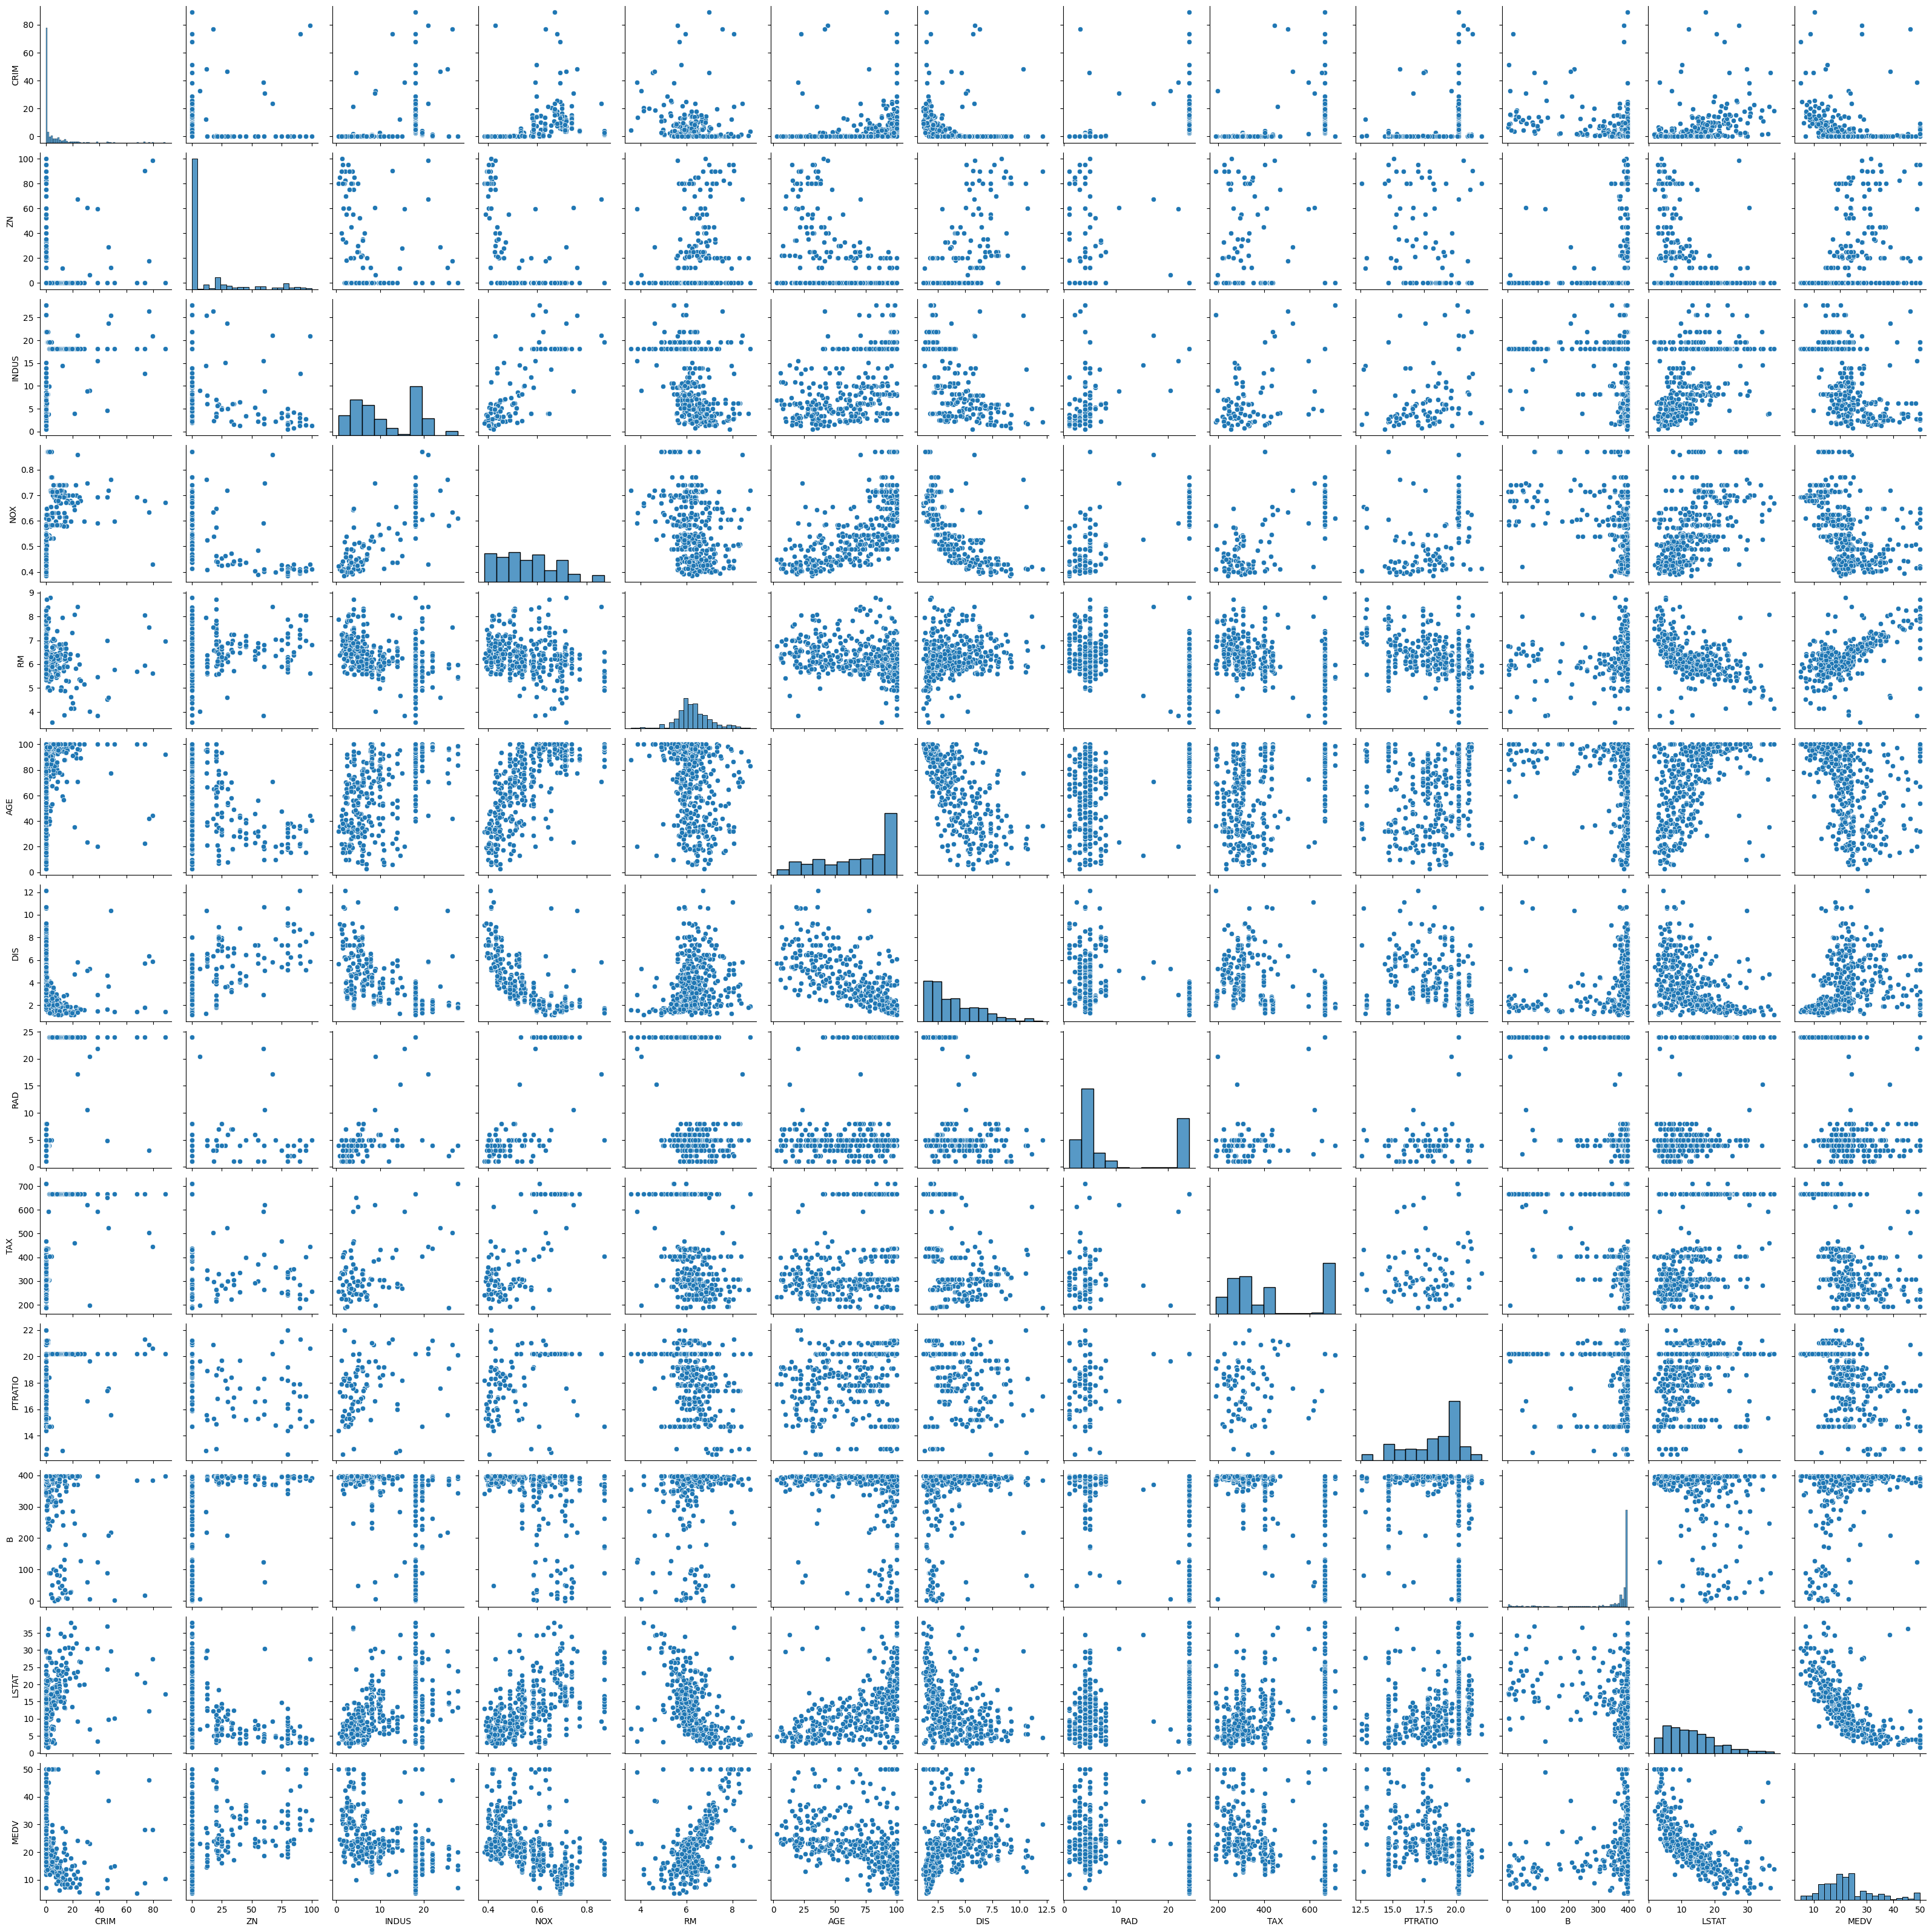

In [18]:
sns.pairplot(X_train_compl.drop(columns='CHAS'))
plt.show()

Observamos que hay ciertas relaciones que parecen no ser lineales, por ejemplo, LSTAT con MEDV, DIS con NOX y RM con LSTAT. Dandonos a entender que en un heatmap basado en una correlación de pearson, esta relación es capaz que no sea vista.

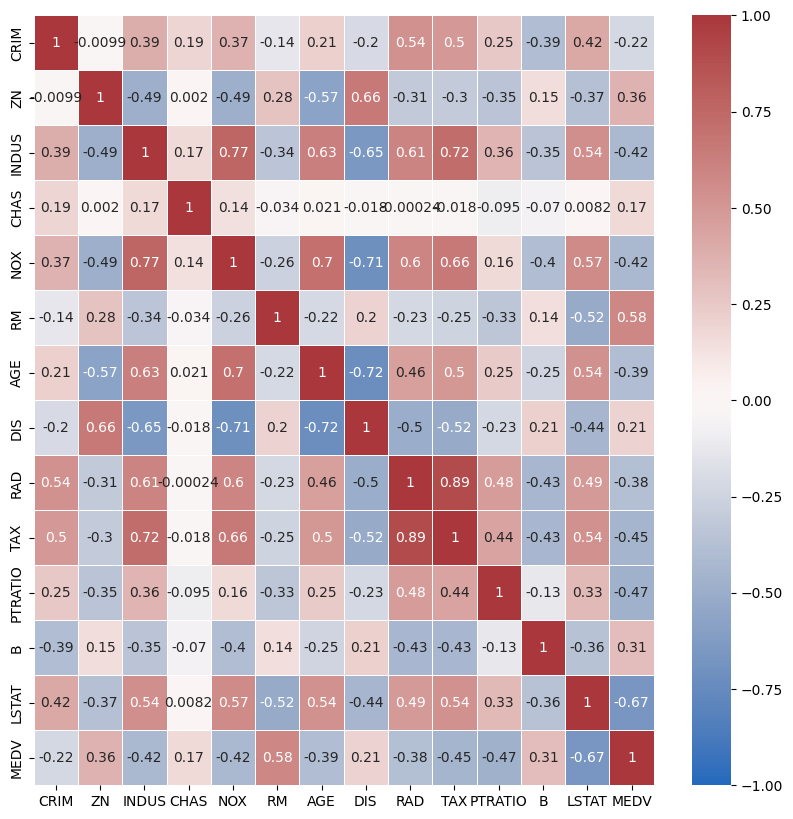

In [19]:
corrmat = X_train_compl.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1,vmin=-1, annot=True, linewidths=.5, ax=ax, cmap='vlag')
plt.show()

Observamos que algunos coeficientes de la correlación de pearson no pueden captar relaciones que no sean lineales, por eso en el anterior gráfico se pudieron identificar relaciones no lineales.

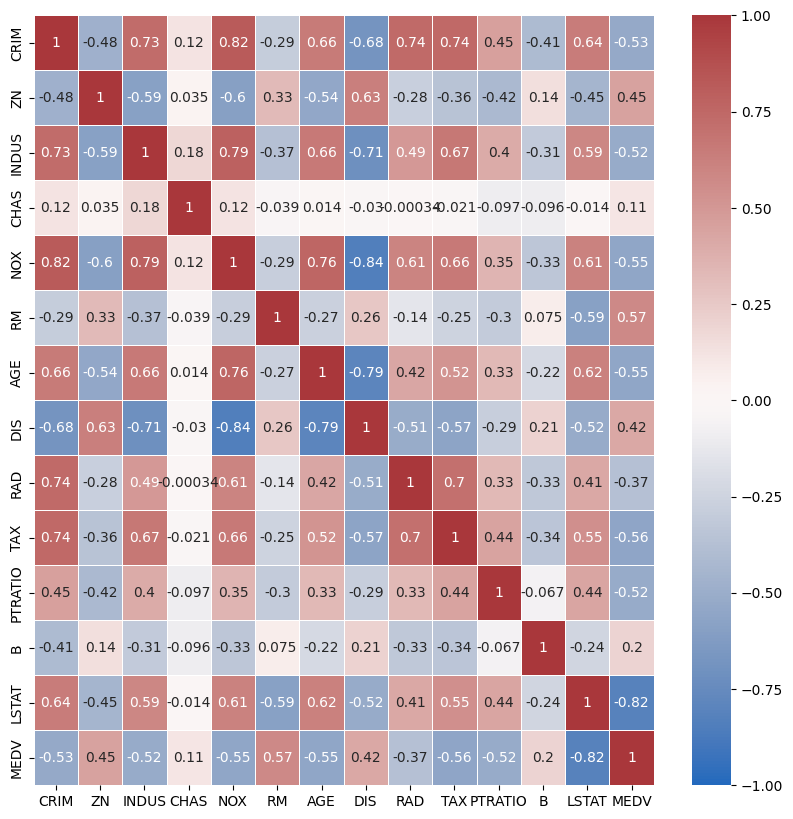

In [20]:
corr_spear_mat = X_train_compl.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_spear_mat, vmax=1,vmin=-1, annot=True, linewidths=.5, ax=ax, cmap='vlag')
plt.show()

Como indicamos en el heatmap anterior, al cambiar el método de correlación, el coeficiente de correlación aumento en algunos casos, dando a entender que son relaciones no lineales.

## 4. Implementar la solución del problema de regresión con regresión lineal múltiple.

### Linear Regression

In [21]:
modelo_lr_escalado = LinearRegression()
modelo_lr_escalado.fit(x_train_imp_esc,y_train_modif)
y_pred_lr_test = modelo_lr_escalado.predict(x_test_imp_esc)
y_pred_lr_test = y_pred_lr_test.reshape(-1,1)
y_pred_lr_entrenamiento = modelo_lr_escalado.predict(x_train_imp_esc)

rmse_lr_test = mean_squared_error(y_test, y_pred_lr_test, squared = False)
rmse_lr_entrenamiento = mean_squared_error(y_train_modif, y_pred_lr_entrenamiento, squared = False)
print(f"El error (RMSE) de entrenamiento es: {rmse_lr_entrenamiento} y el error (RMSE) de test es: {rmse_lr_test}")

El error (RMSE) de entrenamiento es: 5.475971479943906 y el error (RMSE) de test es: 7.905351227414875


In [22]:
# Calculamos el R2 en entrenamiento y testeo
R2_lr_train, R2_lr_test = modelo_lr_escalado.score(x_train_imp_esc,y_train_modif), modelo_lr_escalado.score(x_test_imp_esc,y_test)

print(f'El R2 de entrenamiento es: {R2_lr_train:.5f}, y el R2 de test es: {R2_lr_test:.5f}')

El R2 de entrenamiento es: 0.66981, y el R2 de test es: 0.24861


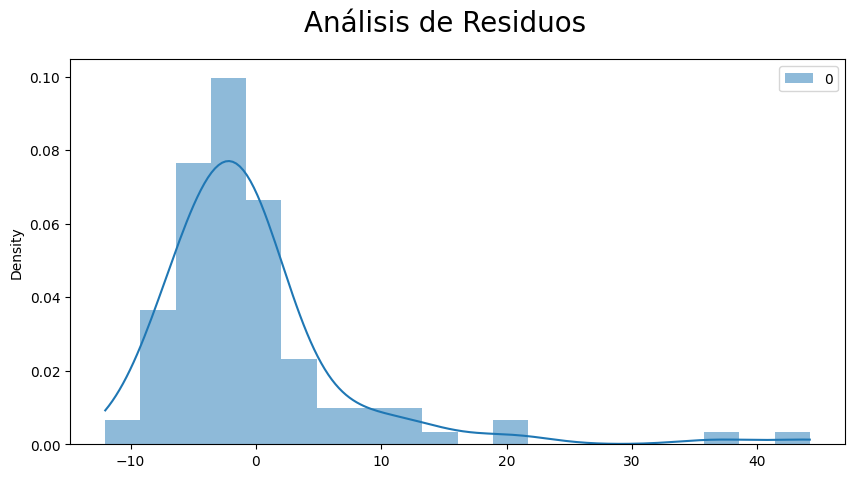

In [23]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred_lr_test), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

Se observa una distribución normal en los residuos de la regresión lineal. Aún asi, hay valores que no parecen seguir la normalidad, por lo tanto analizaremos esos valores.

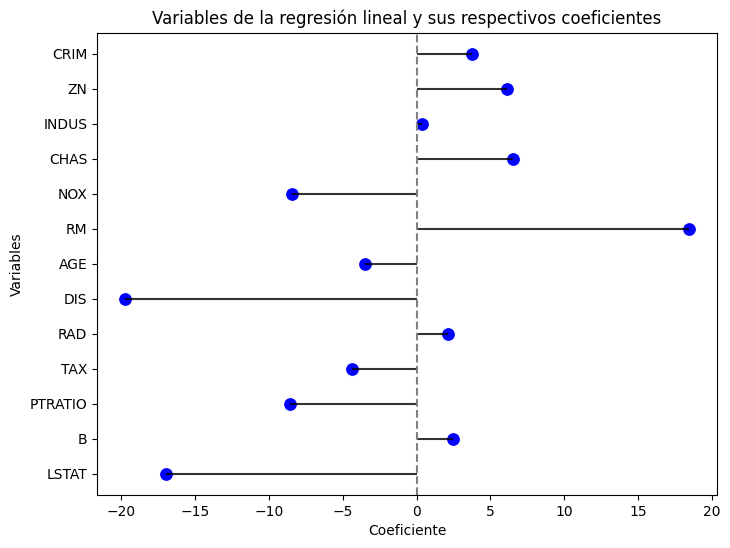

In [24]:
coeficientes_lr = modelo_lr_escalado.coef_
variables_lr = x_train_imp_esc.columns
coef_var_lr_df = pd.DataFrame({'vars':variables_lr, 'coefs':coeficientes_lr})

plt.figure(figsize=(8, 6))

for i in range(len(coef_var_lr_df)):
    plt.hlines(y=coef_var_lr_df['vars'][i], xmin=0, xmax=coef_var_lr_df['coefs'][i], color='black', alpha=0.8)


sns.scatterplot(x='coefs', y='vars', data=coef_var_lr_df, color='blue', s=100)

plt.axvline(x=0, color='grey', linestyle='--')

plt.title('Variables de la regresión lineal y sus respectivos coeficientes')
plt.xlabel('Coeficiente')
plt.ylabel('Variables')

plt.show()

Se observa que INDUS no presenta relevancia a la hora de la regresión lineal y RM, DIS y LSTAT parecen ser las variables más relevantes del modelo.
Además se observa que varios coeficientes son muy grandes, dando a entender que los outliers encontrados a continuación puede estar afectando la regresión lineal.

In [25]:
residuos = (y_test - y_pred_lr_test)
for residuo in residuos:
    if residuo > 15:
        print(residuo)

[44.19986613]
[21.14498909]
[19.46334609]
[36.77576056]


Al visualizar que los residuos se encontraban entre -15 y 15 dentro de la normalidad, extraje los mayores a 15, que hacian ruido en el análisis de residuos. Al analizarlos podemos afirmar que son outliers, al ser 3 o 4 valores de los 107 valores de testeo.

### Gradiente descendiente

Gradiente descendiente

In [64]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_val = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))
    
    mejor_test_mse = 100
    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época
    train_r2s = []
    test_r2s = []
    tss_train = np.sum((y_train - np.mean(y_train))**2)
    tss_test = np.sum((y_val - np.mean(y_val))**2)
    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.sqrt(np.mean(error_train ** 2))
        train_errors.append(train_mse)
        train_r2 = 1 - (np.sum(error_train ** 2) / tss_train)
        train_r2s.append(train_r2)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W) 
        error_test = y_val - prediction_test 
        test_mse = np.sqrt(np.mean(error_test ** 2))
        test_errors.append(test_mse)
        test_r2 = 1 - (np.sum(error_test ** 2) / tss_test)
        test_r2s.append(test_r2)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
        W = W - (lr * gradient)

        if test_mse < mejor_test_mse:
            mejor_test_mse = test_mse
            mejor_train_mse = train_mse
            mejor_train_r2 = train_r2
            mejor_test_r2 = test_r2
            mejor_epoca = _
            mejor_w = W
    
    plt.figure(figsize=(12, 8))
    plt.subplot(2,1,1), plt.plot(train_r2s, label='R2 de entrenamiento'), plt.plot(test_r2s, label='R2 de prueba'), plt.title('R2 de entrenamiento y prueba vs iteraciones (GD)'), plt.ylabel('R2'), plt.xticks([])
    plt.subplot(2,1,2), plt.plot(train_errors, label='Error de entrenamiento') ,plt.plot(test_errors, label='Error de prueba'), plt.title('Error de entrenamiento y prueba vs iteraciones (GD)'), plt.xlabel('Épocas') , plt.ylabel('Raíz del error cuadrático medio')
    
    plt.legend()
    plt.show()
    print(f'El mejor RMSE de entrenamiento es {mejor_train_mse}, el mejor RMSE de prueba es {mejor_test_mse}\nEl mejor R2 de entrenamiento es {mejor_train_r2}el mejor R2 de prueba es {mejor_test_r2}\nLa época de mejor R2 y RMSE es {mejor_epoca}')
    return mejor_w, mejor_test_mse

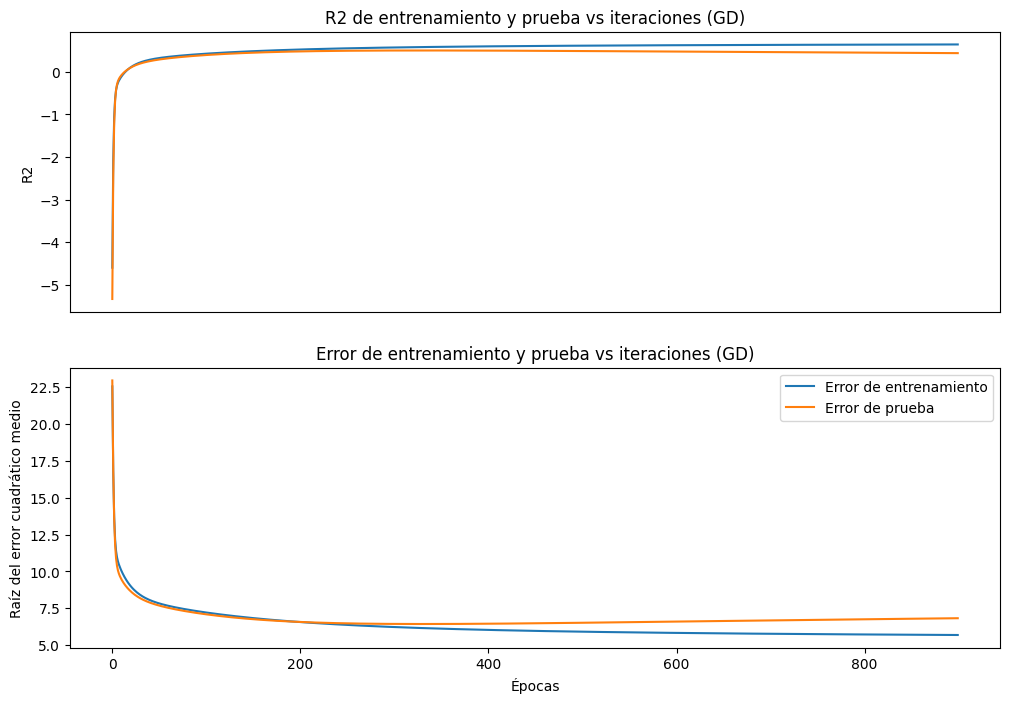

El mejor RMSE de entrenamiento es 6.160448909143071, el mejor RMSE de prueba es 6.436505790454216
El mejor R2 de entrenamiento es 0.5821094174019092el mejor R2 de prueba es 0.5018908827265149
La época de mejor R2 y RMSE es 330


In [65]:
y_train_modif_m = y_train_modif.values.reshape(-1,1)
coefs_gd, mejor_test_mse_gd = gradient_descent(x_train_imp_esc, y_train_modif_m, x_test_imp_esc, y_test, epochs=900, lr=0.05)

Se observa que no hay ruido, el error y R2 son muy parecidos para prueba y entrenamiento, el empeoramiento de estos tarda en notarse en las épocas.

Gradiente descendiente mini-batch

In [66]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=200, batch_size=21):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)
    mejor_test_mse = 100
    train_errors = []
    test_errors = []
    train_r2s = []
    test_r2s = []
    tss_train = np.sum((y_train - np.mean(y_train))**2)
    tss_test = np.sum((y_test - np.mean(y_test))**2)

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.sqrt(np.mean(error ** 2))
            train_errors.append(train_mse)
            train_r2 = 1 - (np.sum(error ** 2) / tss_train)
            train_r2s.append(train_r2) 

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.sqrt(np.mean(error_test ** 2))
            test_errors.append(test_mse)
            test_r2 = 1 - (np.sum(error_test ** 2) / tss_test)
            test_r2s.append(test_r2)
            if test_mse < mejor_test_mse:
                mejor_test_mse = test_mse
                mejor_train_mse = train_mse
                mejor_train_r2 = train_r2
                mejor_test_r2 = test_r2
                mejor_epoca = i
                mejor_w = W
        
        

    plt.figure(figsize=(12, 6))
    
    plt.subplot(2,1,1), plt.plot(train_r2s, label='R2 de entrenamiento'), plt.plot(test_r2s, label='R2 de prueba'), plt.title('R2 de entrenamiento y prueba vs iteraciones (MBGD)'), plt.ylabel('R2'), plt.xticks([])
    plt.subplot(2,1,2), plt.plot(train_errors, label='Error de entrenamiento') ,plt.plot(test_errors, label='Error de prueba'), plt.title('Error de entrenamiento y prueba vs iteraciones (MBGD)'), plt.xlabel('Batchs') , plt.ylabel('Raíz del error cuadrático medio')
    
    plt.legend()
    plt.show()
    print(f'El mejor RMSE de entrenamiento es {mejor_train_mse}, el mejor RMSE de prueba es {mejor_test_mse}\nEl mejor R2 de entrenamiento es {mejor_train_r2}, el mejor R2 de prueba es {mejor_test_r2}\nLa época de mejor R2 y RMSE es {mejor_epoca}')
    return mejor_w, mejor_test_mse

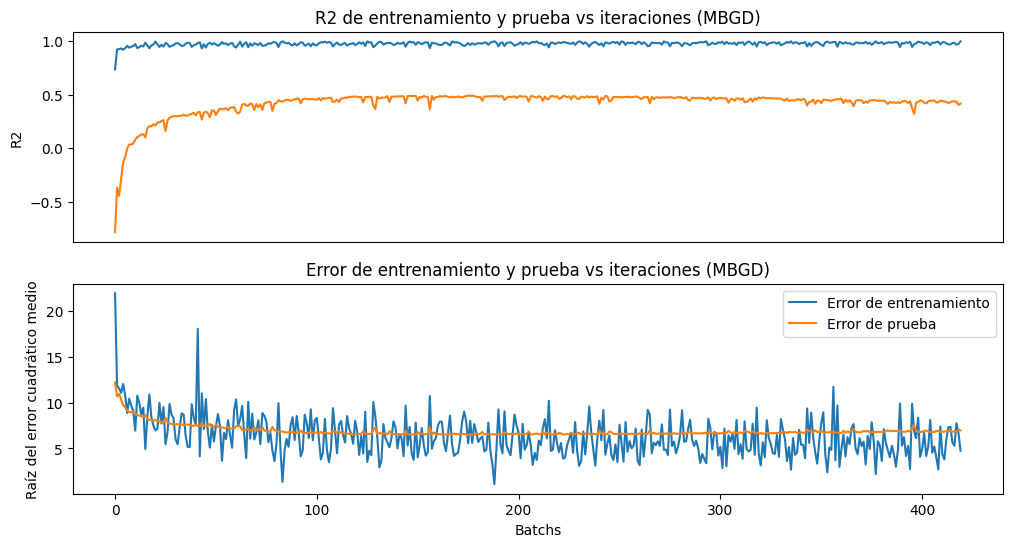

El mejor RMSE de entrenamiento es 5.553424884959236, el mejor RMSE de prueba es 6.506060660790483
El mejor R2 de entrenamiento es 0.9831007857634765, el mejor R2 de prueba es 0.4910672733238759
La época de mejor R2 y RMSE es 8


In [67]:
coefs_gd_mb, mejor_test_mse_gdmb = mini_batch_gradient_descent(x_train_imp_esc, y_train_modif_m, x_test_imp_esc, y_test, epochs=20, lr=0.1)

Se observa un ruido moderado en entrenamiento y prueba, sucede que el R2 de entrenamiento siempre se mantiene muy cercano a 1.

Gradiente descendiente estocástico

In [68]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors_sgd = []
    test_errors_sgd = []
    r2s_sgd_train = []
    r2s_sgd_test = []
    mejor_test_mse = 100
    tss_train = np.sum((y_train - np.mean(y_train))**2)
    tss_test = np.sum((y_test - np.mean(y_test))**2)

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = np.sqrt(np.mean(error ** 2))
            train_errors_sgd.append(train_mse)
            train_r2 = 1 - (np.sum(error ** 2) / tss_train)
            r2s_sgd_train.append(train_r2) 
            
            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.sqrt(np.mean(error_test ** 2))
            test_errors_sgd.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)
            test_r2 = 1 - (np.sum(error_test ** 2) / tss_test)
            r2s_sgd_test.append(test_r2)
            
            W = W - (lr * gradient)
            
            if test_mse < mejor_test_mse:
                mejor_test_mse = test_mse
                mejor_train_mse = train_mse
                mejor_train_r2 = train_r2
                mejor_test_r2 = test_r2
                mejor_epoca = i
                mejor_w = W
    
    plt.figure(figsize=(12, 8))
    plt.subplot(2,1,1), plt.plot(r2s_sgd_train, label='R2 de entrenamiento'), plt.plot(r2s_sgd_test, label='R2 de prueba'), plt.title('R2 de entrenamiento y prueba vs iteraciones (SGD)'), plt.ylabel('R2'), plt.xticks([])
    plt.subplot(2,1,2), plt.plot(train_errors_sgd, label='Error de entrenamiento') ,plt.plot(test_errors_sgd, label='Error de prueba'), plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)'), plt.xlabel('Iteraciones') , plt.ylabel('Raíz del error cuadrático medio')

    plt.legend()
    plt.show()
    
    print(f'El mejor RMSE de entrenamiento es {mejor_train_mse}, el mejor RMSE de prueba es {mejor_test_mse}\nEl mejor R2 de entrenamiento es {mejor_train_r2}, el mejor R2 de prueba es {mejor_test_r2}\nLa época de mejor R2 y RMSE es {mejor_epoca}')
    
    return mejor_w, mejor_test_mse

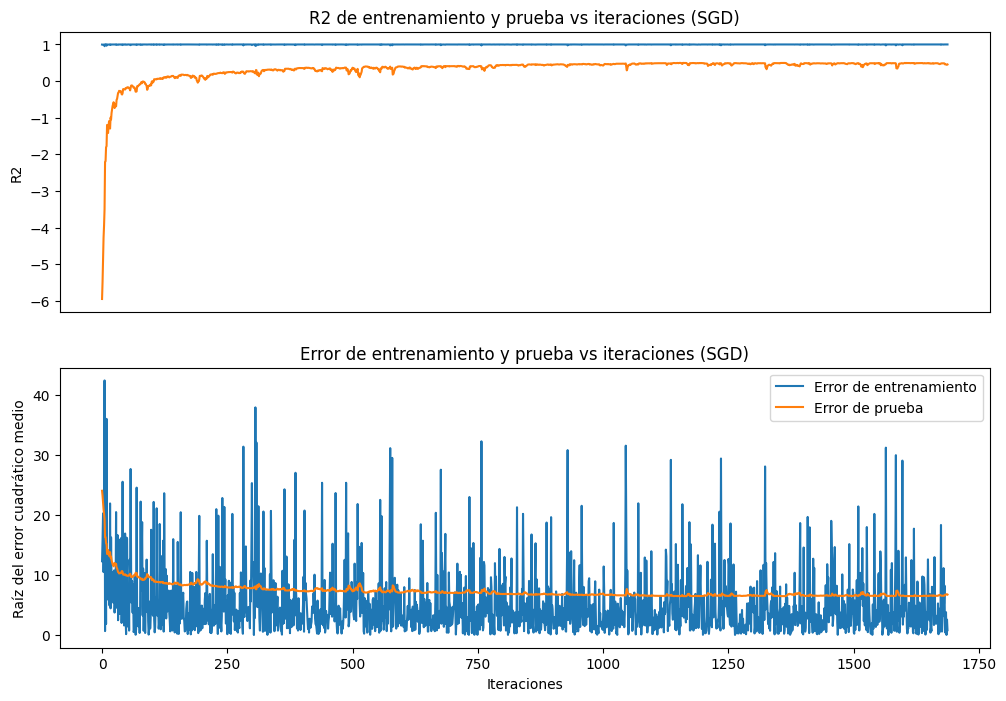

El mejor RMSE de entrenamiento es 6.530242308757419, el mejor RMSE de prueba es 6.468628992299953
El mejor R2 de entrenamiento es 0.998887284838654, el mejor R2 de prueba es 0.4969065671227859
La época de mejor R2 y RMSE es 2


In [69]:
coefs_sgd_manual, mejor_rmse_test_sgd = stochastic_gradient_descent(x_train_imp_esc, y_train_modif_m, x_test_imp_esc, y_test, epochs=4, lr=0.01)

Se observa mucho ruido en entrenamiento, pero en prueba parece ser más estable, esto debido a que entrena dato a dato.

### Lasso

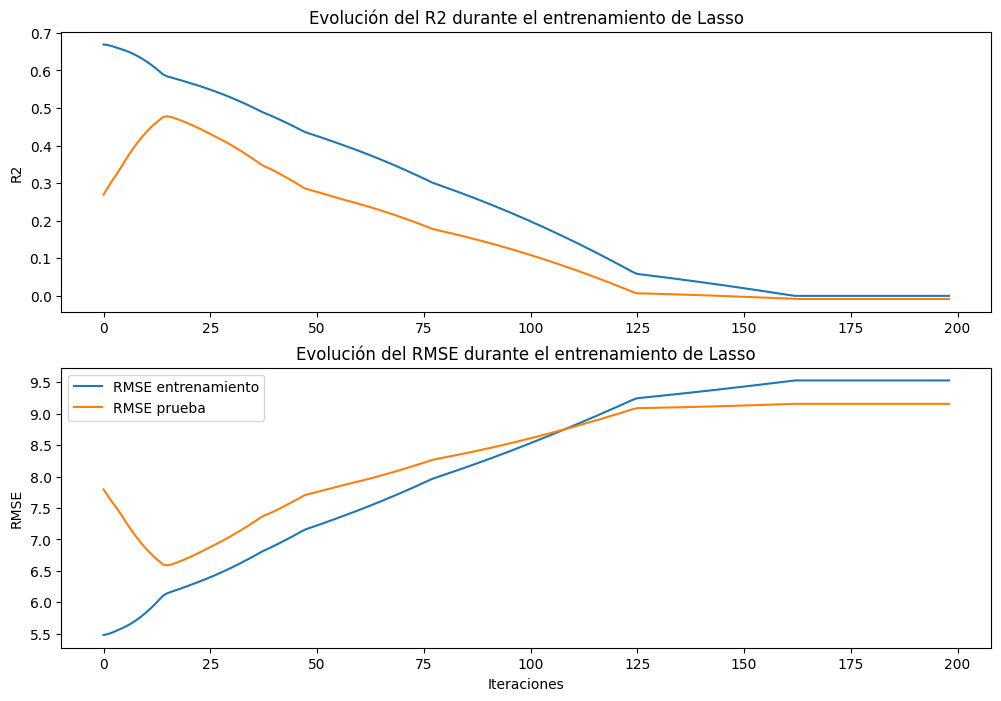

El mejor R2 de entrenamiento es: 0.5838884448435485 y el R2 de testeo es: 0.4779594726610652. El mejor alpha es: 0.16
El mejor RMSE de entrenamiento es: 6.147321912248711 y el mejor RMSE de testeo es: 6.589311347691774
Con una alpha de 0.16


In [63]:
mejor_r2_lasso_test = -1
mejor_alpha_lasso = 0
r2s_lasso_train = []
r2s_lasso_test = []
rmse_lasso_test = []
rmse_lasso_train = []

for alpha in np.arange(0.01,2,0.01):
    modelo_lasso_escalado = Lasso(alpha=alpha,fit_intercept=True)
    modelo_lasso_escalado.fit(x_train_imp_esc,y_train_modif)

    y_pred_lasso_test = modelo_lasso_escalado.predict(x_test_imp_esc)
    y_pred_lasso_train = modelo_lasso_escalado.predict(x_train_imp_esc)

    lasso_r2_train = modelo_lasso_escalado.score(x_train_imp_esc,y_train_modif) 
    lasso_r2_test = modelo_lasso_escalado.score(x_test_imp_esc,y_test)

    r2s_lasso_train.append(lasso_r2_train)
    r2s_lasso_test.append(lasso_r2_test)

    rmse_lasso_train.append(mean_squared_error(y_train_modif, y_pred_lasso_train,squared=False))
    rmse_lasso_test.append(mean_squared_error(y_test,y_pred_lasso_test,squared=False))
    
    if lasso_r2_test > mejor_r2_lasso_test:
        mejor_r2_lasso_test = lasso_r2_test
        mejor_alpha_lasso = alpha
        mejor_r2_lasso_train = lasso_r2_train
        mejor_rmse_lasso_train = mean_squared_error(y_train_modif, y_pred_lasso_train,squared=False)
        mejor_rmse_lasso_test = mean_squared_error(y_test,y_pred_lasso_test,squared=False)
        mejor_coef_lasso = modelo_lasso_escalado.coef_

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1), plt.plot(r2s_lasso_train, label='entrenamiento'),plt.plot(r2s_lasso_test, label='prueba'), plt.title('Evolución del R2 durante el entrenamiento de Lasso'), plt.ylabel('R2')
plt.subplot(2,1,2), plt.plot(rmse_lasso_train, label='RMSE entrenamiento'), plt.plot(rmse_lasso_test, label='RMSE prueba'), plt.title('Evolución del RMSE durante el entrenamiento de Lasso'), plt.xlabel('Iteraciones') ,plt.ylabel('RMSE')
plt.legend()
plt.show()

print(f"El mejor R2 de entrenamiento es: {mejor_r2_lasso_train} y el R2 de testeo es: {mejor_r2_lasso_test}.")
print(f"El mejor RMSE de entrenamiento es: {mejor_rmse_lasso_train} y el mejor RMSE de testeo es: {mejor_rmse_lasso_test}\nCon una alpha de {mejor_alpha_lasso}")

Observamos que la evolución del error y del R2 es lineal, y que en la iteración 0 se encuentra la regresión lineal.

### Ridge

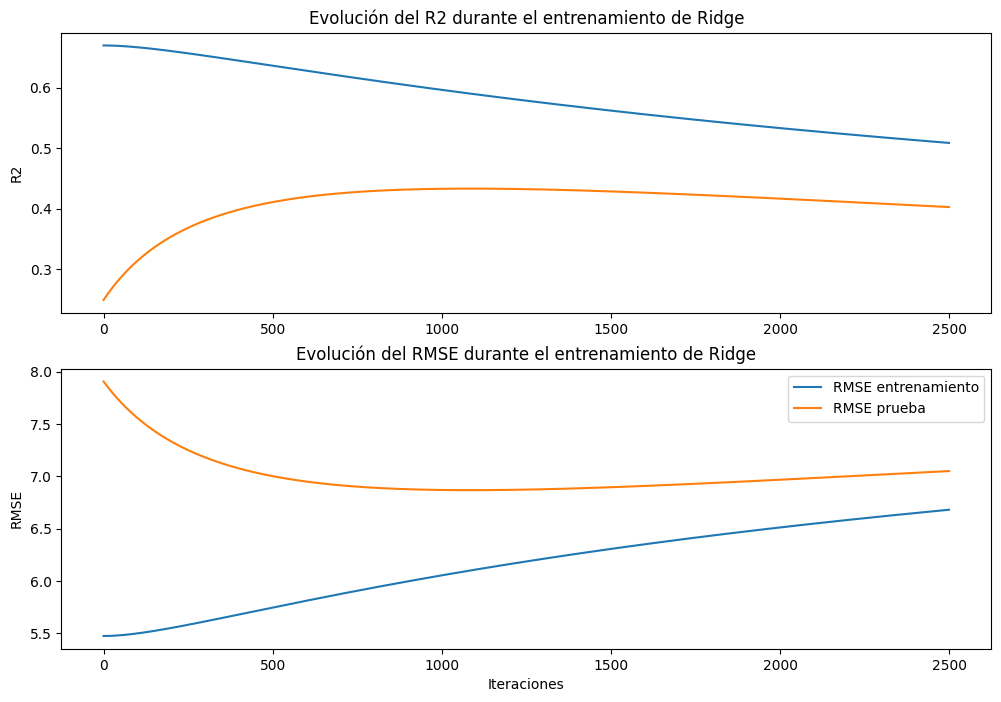

El mejor R2 de entrenamiento es: 0.5901103441305082 y el R2 de testeo es: 0.4329137174607185. El mejor alpha es: 10.84
El mejor RMSE de entrenamiento es: 6.101189965138609 y el mejor RMSE de testeo es: 6.867718566617346


In [62]:
mejor_r2_ridge_test = -1
mejor_alpha_ridge = 0
r2s_ridge_train = []
r2s_ridge_test = []
rmse_ridge_test = []
rmse_ridge_train = []
for alpha in np.arange(0,25,0.01):
    modelo_ridge_escalado = Ridge(alpha=alpha)
    modelo_ridge_escalado.fit(x_train_imp_esc,y_train_modif)

    y_pred_ridge_test = modelo_ridge_escalado.predict(x_test_imp_esc)
    y_pred_ridge_entrenamiento = modelo_ridge_escalado.predict(x_train_imp_esc)

    ridge_r2_train = modelo_ridge_escalado.score(x_train_imp_esc,y_train_modif) 
    ridge_r2_test = modelo_ridge_escalado.score(x_test_imp_esc,y_test)

    r2s_ridge_train.append(ridge_r2_train)
    r2s_ridge_test.append(ridge_r2_test)

    rmse_ridge_train.append(mean_squared_error(y_train_modif, y_pred_ridge_entrenamiento,squared=False))
    rmse_ridge_test.append(mean_squared_error(y_test,y_pred_ridge_test,squared=False))
    
    if ridge_r2_test > mejor_r2_ridge_test:
        mejor_r2_ridge_test = ridge_r2_test
        mejor_alpha_ridge = alpha
        mejor_r2_ridge_train = ridge_r2_train
        mejor_rmse_ridge_train = mean_squared_error(y_train_modif, y_pred_ridge_entrenamiento,squared=False)
        mejor_rmse_ridge_test = mean_squared_error(y_test,y_pred_ridge_test,squared=False)
        mejor_coef_ridge = modelo_ridge_escalado.coef_


plt.figure(figsize=(12, 8))
plt.subplot(2,1,1), plt.plot(r2s_ridge_train, label='entrenamiento'),plt.plot(r2s_ridge_test, label='prueba'), plt.title('Evolución del R2 durante el entrenamiento de Ridge'), plt.ylabel('R2')
plt.subplot(2,1,2), plt.plot(rmse_ridge_train, label='RMSE entrenamiento'), plt.plot(rmse_ridge_test, label='RMSE prueba'), plt.title('Evolución del RMSE durante el entrenamiento de Ridge'), plt.xlabel('Iteraciones') ,plt.ylabel('RMSE')
plt.legend()
plt.show()

print(f"El mejor R2 de entrenamiento es: {mejor_r2_ridge_train} y el R2 de testeo es: {mejor_r2_ridge_test}.")
print(f"El mejor RMSE de entrenamiento es: {mejor_rmse_ridge_train} y el mejor RMSE de testeo es: {mejor_rmse_ridge_test}\nCon un alpha de {mejor_alpha_ridge}")

Observamos que a diferencia de Lasso el error y R2 de prueba parece más una función raiz. El error y R2 de entrenamiento sigue siendo lineal.

### Elastic Net

In [58]:
modelo_enet_escalado = ElasticNetCV(alphas=np.logspace(-2,2,num=150),n_alphas=150, l1_ratio=np.logspace(-2,2,num=150))
modelo_enet_escalado.fit(x_train_imp_esc,y_train_modif)
y_pred_enet_test = modelo_enet_escalado.predict(x_test_imp_esc)
y_pred_enet_entrenamiento = modelo_enet_escalado.predict(x_train_imp_esc)
print(f"El R2 de entrenamiento es: {modelo_enet_escalado.score(x_train_imp_esc,y_train_modif)} y el R2 de testeo es: {modelo_enet_escalado.score(x_test_imp_esc,y_test)}")

El R2 de entrenamiento es: 0.6652562190861577 y el R2 de testeo es: 0.32209445126692615


In [37]:
rmse_enet_entrenamiento = np.sqrt(mean_squared_error(y_train_modif, y_pred_enet_entrenamiento))
rmse_enet_test = np.sqrt(mean_squared_error(y_test,y_pred_enet_test))
print(f"El RMSE de entrenamiento es: {rmse_enet_entrenamiento} y el RMSE de testeo es: {rmse_enet_test}")

El RMSE de entrenamiento es: 5.511643280559657 y el RMSE de testeo es: 7.518507777373716


### Conclusiones sobre fitting

Es necesario obtener métricas como R2, MSE o RMSE para ambos conjuntos, ya que se puede dar la ocasión de que las métricas de entrenamiento sean muy buenas, dando idea de overfitting, y las métricas de testeo sean normales. En conclusión observar las métricas de entrenamiento sirven para descartar posibles overfittings.

Creemos que llegamos a un buen punto, pero todo sostenido sobre experimentaciones a ojo. Capaz con las versiones de cross validation de los mismos métodos podrían ser mejores.

## 5. Optimización de hiperparámetros.

### Gradiente descendiente

Observamos y probamos que al variar la tolerancia a mayor es el valor, mayor es el ruido en el error y además no parece converger luego de un número de iteraciones, en donde con menor valor de tolerancia, el error de entrenamiento es mejor que el de testeo.(Esto significa que el modelo entra en un estado de overfitting, pero aún asi el error en general es mejor).

En el caso del número de iteraciones aumenta, observamos y probamos que el error de testeo llega a un punto mínimo y comienza a incrementar, por otro lado el error de entrenamiento decrece hasta un punto de convergencia, en donde es menor que el de testeo. Y en el caso de tener muy pocas iteraciones, el modelo entra en un estado de underfitting, es decir, mucho error en ambos casos.

### Lasso y Ridge

Observamos y probamos que al varíar el alpha de ambos modelos de este dataset, cuando se aumenta el mismo, el R2 disminuye para ambos conjuntos y el MSE se incrementa. Por el contrario al disminuir el mismo, el R2 llega a un punto máximo local y en caso de seguir disminuyendo el valor de alpha empeora el R2, lo mismo con MSE pero de manera inversa, es decir, el MSE disminuye llegando a un punto mínimo local y en caso de seguir disminuyendo el valor de alpha empeora el MSE

## 6. Comparación de modelos.

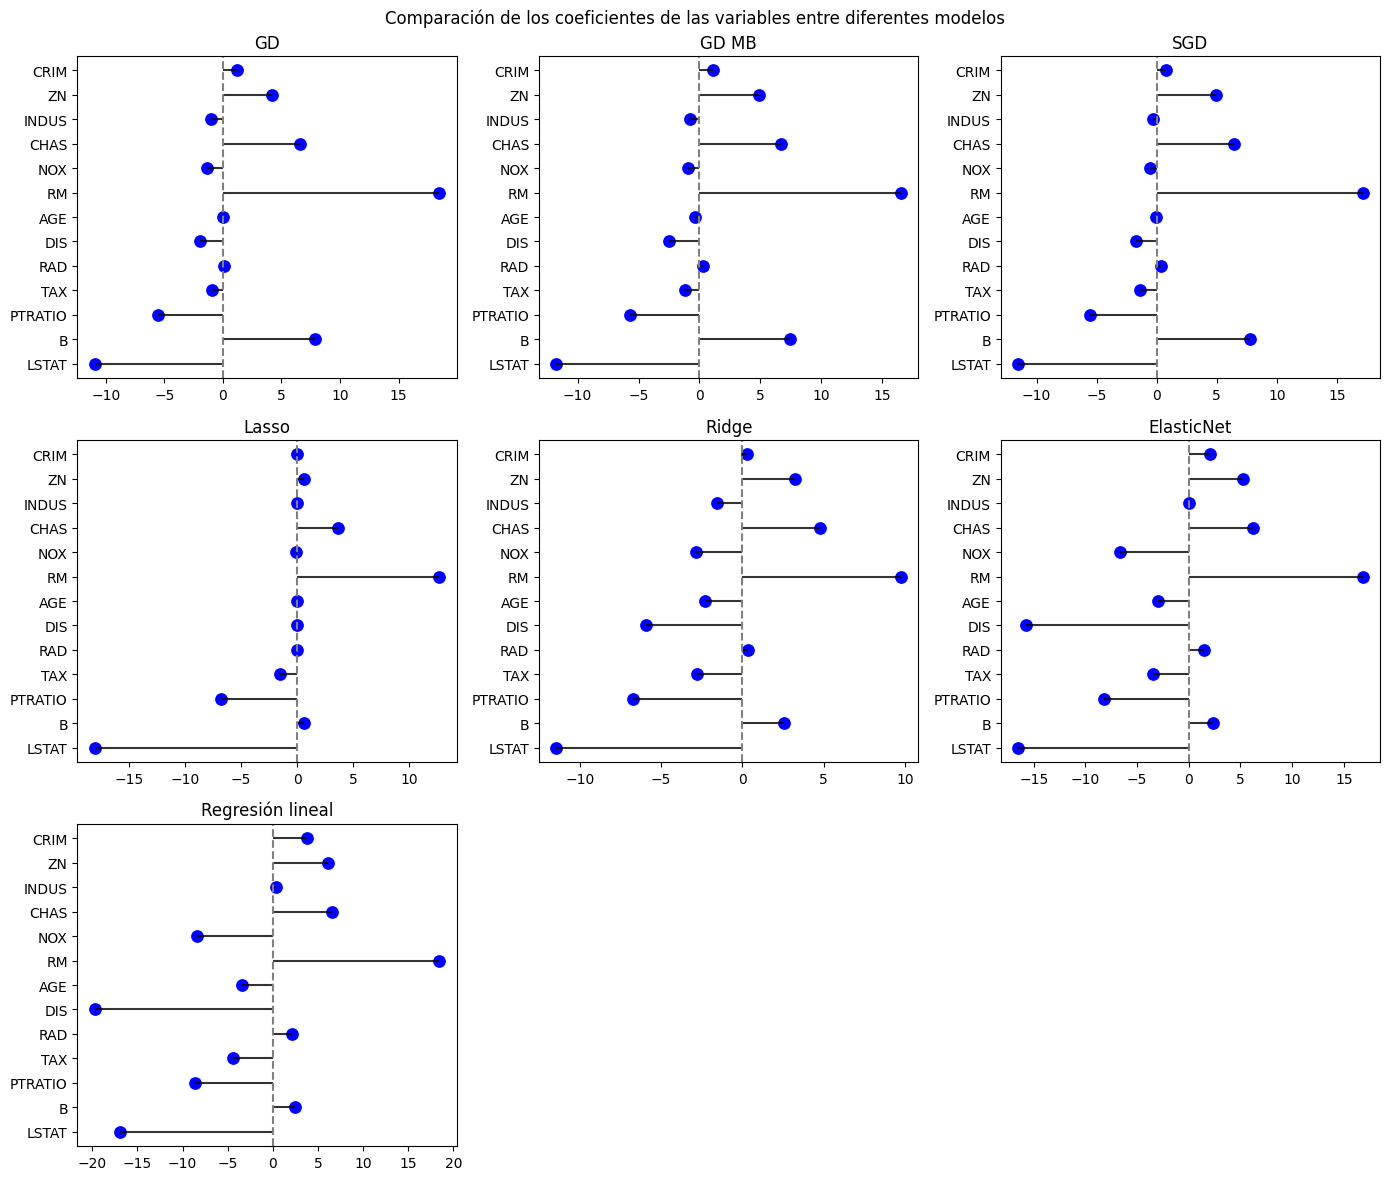

In [50]:
coeficientes_lr = modelo_lr_escalado.coef_
variables_lr = x_train_imp_esc.columns

coefs_gd_resh = coefs_gd[1:].reshape(13,)
coefs_gd_mb_resh = coefs_gd_mb[1:].reshape(13,)
coefs_gd_sgd_resh = coefs_sgd_manual[1:].reshape(13,)

coef_var_lr_df = pd.DataFrame({'vars':variables_lr, 'coefs':coeficientes_lr})

coef_var_gd_df = pd.DataFrame({'vars':variables_lr, 'coefs': coefs_gd_resh})
coef_var_gd_mb_df = pd.DataFrame({'vars':variables_lr, 'coefs': coefs_gd_mb_resh})
coef_var_sgd_df = pd.DataFrame({'vars':variables_lr, 'coefs': coefs_gd_sgd_resh})

coef_var_lasso_df = pd.DataFrame({'vars':variables_lr, 'coefs': mejor_coef_lasso})
coef_var_ridge_df = pd.DataFrame({'vars':variables_lr, 'coefs': mejor_coef_ridge})
coef_var_elasticnet_df = pd.DataFrame({'vars':variables_lr, 'coefs': modelo_enet_escalado.coef_})

lista_coefs = [coef_var_gd_df,coef_var_gd_mb_df,coef_var_sgd_df,coef_var_lasso_df,coef_var_ridge_df,coef_var_elasticnet_df,coef_var_lr_df]
lista_nombres = ['GD', 'GD MB', 'SGD', 'Lasso', 'Ridge', 'ElasticNet', 'Regresión lineal']

def graficar_coefs(lista, lista_nombres):
    plt.figure(figsize=(14, 12))
    plt.suptitle('Comparación de los coeficientes de las variables entre diferentes modelos')
    for i, df in enumerate(lista):
        plt.subplot(3,3,i+1)
        for j in range(len(df)):
            plt.hlines(y=df['vars'][j], xmin=0, xmax=df['coefs'][j], color='black', alpha=0.8)
        sns.scatterplot(x='coefs', y='vars', data=df, color='blue', s=100)
        plt.axvline(x=0, color='grey', linestyle='--')
        plt.title(lista_nombres[i])
        plt.xlabel('')
        plt.ylabel('')

graficar_coefs(lista_coefs, lista_nombres)
plt.tight_layout()
plt.show()

Podemos observar que en los modelos de GD la variable RM obtiene una importancia mayor, DIS es reducida casi en su totalidad, al igual que NOX. Parece que los modelos de GD tienen un resultado similar. En los modelos de regularización se observa una diferencia significativa entre los mismos. En Lasso se nota que es más estricto en la selección de variables, al ser L1, tiene más probabilidades de recortar algunas de ellas como DIS que tiene un peso importante en la regresión lineal básica. En Ridge se nota el suavizado de este recorte, al ser L2, tiene menos probabilidades de recortar variables, y es más una regresión lineal suavizada. En ElasticNet no parece haber diferencia con la regresión lineal, no se si es por tener malos parámetros o que

In [70]:
print(f'RMSE de prueba de la regresión lineal: {rmse_lr_test}\nRMSE de prueba de GD: {mejor_test_mse_gd}\nRMSE de prueba de GDMB: {mejor_test_mse_gdmb}\nRMSE de prueba de SGD: {mejor_rmse_test_sgd}\nRMSE de prueba de Lasso: {mejor_rmse_lasso_test}\nRMSE de prueba de Ridge: {mejor_rmse_ridge_test}\nRMSE de prueba de ElasticNet: {rmse_enet_test}')

RMSE de prueba de la regresión lineal: 7.905351227414875
RMSE de prueba de GD: 6.436505790454216
RMSE de prueba de GDMB: 6.506060660790483
RMSE de prueba de SGD: 6.468628992299953
RMSE de prueba de Lasso: 6.589311347691774
RMSE de prueba de Ridge: 6.867718566617346
RMSE de prueba de ElasticNet: 7.518507777373716


Según nuestra opinión, el mejor modelo de regresión que observamos fue Gradiente Descendiente por tener el menor RMSE.

## 7. Conclusión

En conclusión, en este trabajo aprendimos que aunque lo que buscamos no es más que una regresión lineal, esta se puede ver muy afectada por los outliers al momento de modelar la regresión, y esto lleva a tener predicciones erroneas. Entonces observamos que utilizando un escalado de datos, este favorece a la regresión lineal en sentido de que los coeficientes no se van a ver alterados por la escala de cada variable. Además utilizando el gradiente descendiente en cualquiera de sus formas (estocástico, mini-batch y batch) se puede llegar a un mejor o mismo resultado de una manera más eficiente. También podemos utilizar metodos de regularización como Lasso o Ridge para que la sensibilidad a outliers no afecte a la regresión. Todo esto aprovechando las métricas de comparación R2 o RMSE, que nos permiten comparar la efectividad entre diferentes modelos. Estos métodos mayormente estan ligados a la validación cruzada que nos ayuda a encontrar los mejores hiperparametros para cada modelo.